#### **Importing modules and libraries**

In [1]:
#importing primary modules
import pandas as pd
import numpy as np

#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib for inline plot
%matplotlib inline

#import and setting warning
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
#load the dataset
Spotify = pd.read_csv(r'C:\Users\DELL\Desktop\Spotify.csv')

#set maximum viewable columns
pd.set_option("display.max_column", 30)

#create a copy of the original dataset
original_copy = Spotify.copy()

#viewing the first five rows
Spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## **Column description**

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_min` | The length of the track, measured in minutes.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|


In [3]:
#size of the dataset
Spotify.shape

(114000, 21)

We have `114000` rows and `20` columns of music tracks in our dataset

#### Checking info summary of the data

In [4]:
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Our dataset contains `20 columns and 11400 rows`. It also shows that there are some null values in the artists, album_name and track_name column. We will now proceed to cleaning the data.

#### **Handling missing values**

In [5]:
#Checking for null values
Spotify.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

The result shows that the artists, album_name and track_name column have single null values. We'll look further into the null variable to understand the reason for the null data. 

In [6]:
#A look at the artists null values
Spotify[Spotify.artists.isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


It turns out that the 3 null values fall under a single row. After careful observation of other values in thesame row, there is no pointer to what the missing values could have been which indicates that it could be an entry error. 

Therefore, we will drop the null values were dropped from the dataset.

#### drop null row

In [7]:
#dropping null values
Spotify.dropna(inplace=True)

#### **Addressing duplicate values**

In [8]:
#view the total number of duplicate values
Spotify.duplicated().sum()

0

In [9]:
#Observing the duplicate rows further and keeping the first value
duplicates = Spotify[Spotify.duplicated(keep='first')]

duplicates

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


The above table displays all duplicate values by their `track_id`. The above output further shows that we have duplicate track ids on the `track_id` column

#### drop duplicate values

In [10]:
#dropping all duplicate values
Spotify.drop_duplicates( inplace=True)

#checking the new shape of the dataset
print(Spotify.shape)

(113999, 21)


After dropping duplicate values, we now have `113549 rows`.

#### Checking unique values in the track_id
we do this because the track id is unique to individual tracks. We can have track with similar artists and album name but not the same id.  

In [11]:
#unique values 
Spotify['track_id'].nunique()

89740

In [12]:
#checking for duplicates in the track_id
duplicate_track_ids = Spotify[Spotify['track_id'].duplicated(keep = 'first')]

#check the size of duplicate values
print(duplicate_track_ids.shape)

#checking counts of duplicate track_id
duplicate_track_ids.groupby('track_id')['track_id'].count()

(24259, 21)


track_id
001APMDOl3qtx1526T11n1    1
001YQlnDSduXd5LgBd66gT    1
003vvx7Niy0yvhvHt4a68B    2
004h8smbIoAkUNDJvVKwkG    1
006rHBBNLJMpQs8fRC2GDe    2
                         ..
7ztSVy67w9rXpKg5L2zN5l    1
7zubR9uYAWjb5KPZTMm85e    3
7zumacGldlmxpoP8bpaeLe    1
7zv2vmZq8OjS54BxFzI2wM    1
7zwn1eykZtZ5LODrf7c0tS    2
Name: track_id, Length: 16641, dtype: int64

There are only `89,740` unique track IDs, indicating that there are approximately `24,259` duplicate values present. To proceed with our analysis, it is necessary to eliminate these duplicate instances and clean the data.

#### drop duplicate track using their track_ids

In [13]:
#drop duplicate track_id
Spotify = Spotify[Spotify['track_id'].duplicated(keep = 'first') == False]

#check shape of new data
Spotify.shape

(89740, 21)

After dropping all duplicate track_id, we now have a total of `89740 songs` in our data set.

### **Correcting inconsistencies**

The song duration given here is in Milliseconds, we'll convert it to minutes and drop the `duration_ms`

In [14]:
#convert time from milliseconds to minutes
Spotify['duration_min'] = round(Spotify['duration_ms'] / 60000,1)

#Drop duration_ms columns
Spotify.drop('duration_ms', axis=1, inplace=True)

In [15]:
#confirming changes
Spotify.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,3.8
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,2.5


After dropping all duplicate values and scrutinizing the track_id, we now have `89740` rows left in our spotify music data frame.

## **STUDYING INDIVIDUAL VARIABLE SEPARATELY**

> 1. **Artists**

In [16]:
Spotify['artists'].nunique()

31437

#### Top 5 contributing Artists


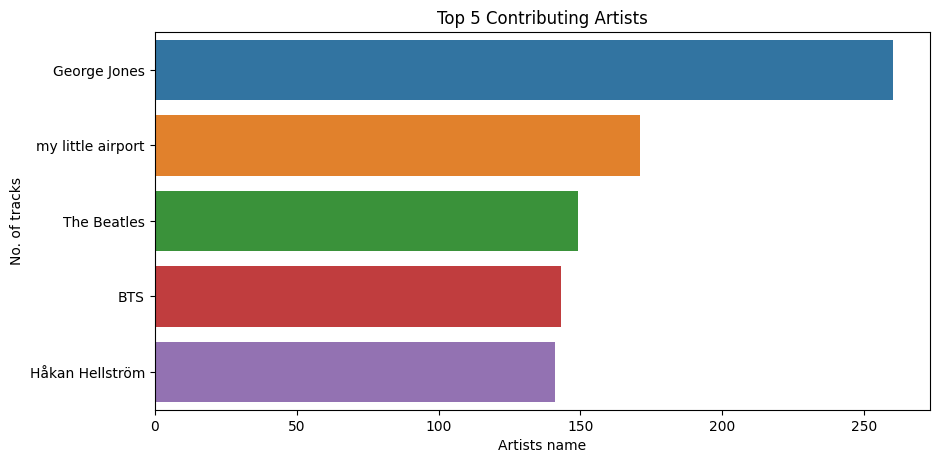

In [17]:
#setting the plot size
plt.figure(figsize = (10,5), dpi = 100)

#plotting the chart
sns.barplot( x = Spotify['artists'].value_counts()[0:5].values, y = Spotify['artists'].value_counts()[0:5].index, orient='h')

#setting the plot title and axis labels
plt.title('Top 5 Contributing Artists')
plt.ylabel('No. of tracks')
plt.xlabel('Artists name')

#display the plot
plt.show()

We were able to find out the top 5 contributing artist and George Jones ranked the highest followed by my little airport and others followed suit

> 2. **Album Name**

Most common album names 

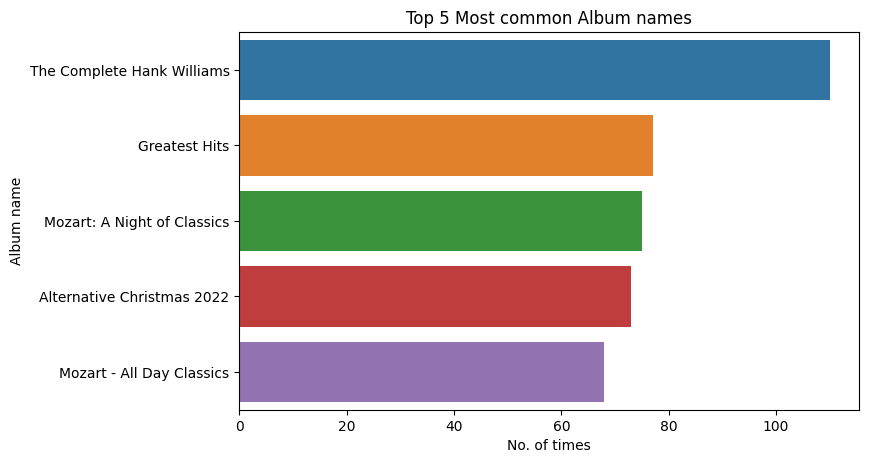

In [18]:
#setting the plot size
plt.figure(figsize = (8,5), dpi = 100)

#plotting the chart
sns.barplot(data=Spotify , y = Spotify['album_name'].value_counts()[0:5].index, x = Spotify['album_name'].value_counts()[0:5],orient="h")

#setting the plot title and axis labels
plt.title('Top 5 Most common Album names')
plt.ylabel('Album name')
plt.xlabel('No. of times')

#display the plot
plt.show()


`The complete Hank Williams` appear over `100` times followed by `Greatest Hits` and the others. This could mean that songs from this to albums will populate the dataset. 
It could also mean that there are lot of songs with the same album name by different artists. We will take further look into this in the Bivariate analysis section.

> 3. **Popularity**

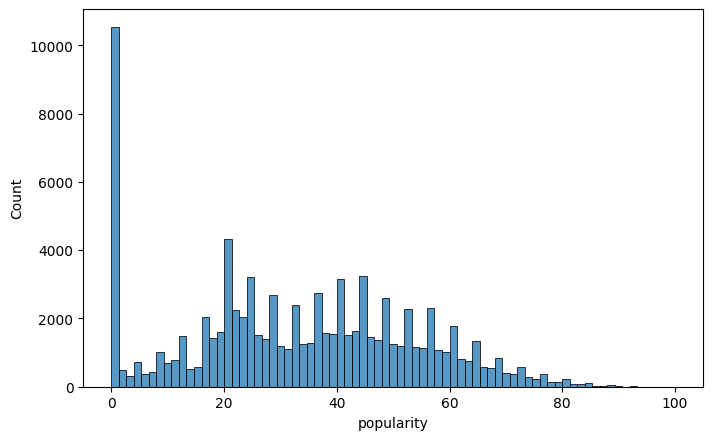

In [19]:
#Setting the plot size
plt.figure(figsize = (8,5), dpi=100)

#Plotting the popularity chart
sns.histplot(Spotify['popularity'], kde=None, fill = True)

#display the plot
plt.show()

Our Spotify data encompasses a wide range of songs, and a higher proportion of it is filled with tracks that have popularity ratings spanning from `0 to 1`. The popularity is most concentrated between `20 and 60` where we have a significant number of tracks.

While these tracks may not enjoy the same level of mainstream popularity, they present a rich and varied assortment for the audience in search of distinctive and less-familiar music. Whether it's hidden treasures or specialized genres, this collection appeals to a broad spectrum of music enthusiasts by curating a selection that extends beyond the most well-known chart-toppers. 

> 4. **Duration**



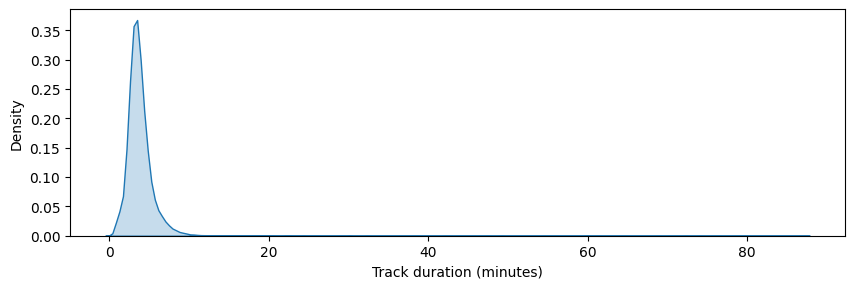

In [20]:
#plotting for time duration with tracks in minutes
plt.figure(figsize = (10,3), dpi = 100)

#define the plot
sns.kdeplot(Spotify['duration_min'], fill = True)

#set label values
plt.xlabel('Track duration (minutes)')

#display the plot
plt.show() 

The graph provides valuable insight into the length of the tracks, indicating a prominent trend within this specific time range. This data suggests that the duration of tracks in the given dataset tends to cluster around the 5-6 minute mark, which is an indication of a common preference or standard within the music industry.


Based on the information presented in the graph, it can be concluded that the majority of tracks had a duration of approximately 5-6 minutes. The graph provides further insights that there are tracks with minutes above `5 minues up to 80 minutes`. 

This is an indication of outliers in the `duration_min` column. We further investigate the `duration_min` column and determine what happens to data.

#### Checking for outliers in the `duration_min` column.

We will make use of the boxplot becuase it can be used to easily detect outliers.

<Axes: >

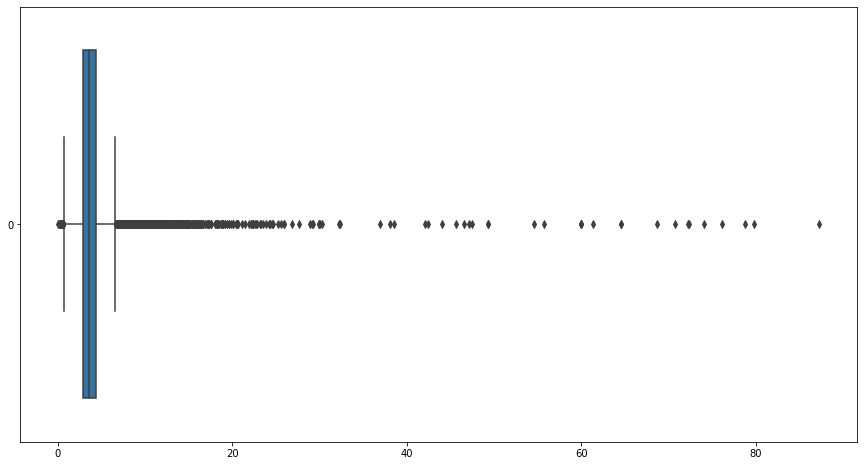

In [21]:
#figuresize
plt.figure(figsize=(15,8))

#define the plot
sns.boxplot(Spotify['duration_min'], orient='h')

In [22]:
Spotify.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,53479.005739,33.198808,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426,3.819054
std,33410.141924,20.580640,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437,1.882577
min,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,23766.750000,19.000000,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000,2.900000
50%,50680.500000,33.000000,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000,3.600000
75%,80618.500000,49.000000,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000,4.400000
max,113999.000000,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.300000


The plot and summary stats shows that duration below `2.9 up to 0.1 min` and values above `3.8 up to 87 min` are outliers in the data. We will now look at tracks that fall into this category. After manually checking some of the tracks in this category, it is obvious that the values are just variance in the dataset and not errors. We will ignore the outliers because they are real data and not errors.

5. **Explicit**

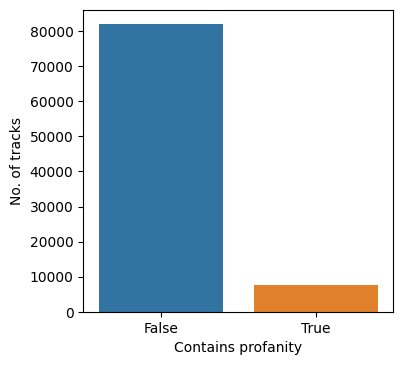

In [23]:
#setting the figure size
plt.figure(figsize = (4,4), dpi = 100)

#defining the plot
sns.barplot(x = Spotify['explicit'].value_counts().index, y = Spotify['explicit'].value_counts().values)

#Setting the title and labels
plt.xlabel('Contains profanity')
plt.ylabel('No. of tracks')

#display the plots
plt.show()

Including songs with explicit content in a company party playlist can create a different impression about the party compared to a personal or casual party. Company parties are often meant to foster a professional and inclusive environment. Including songs with explicit content may be seen as unprofessional and inappropriate in this context. It's important to maintain a level of decorum and ensure that the music aligns with the company's values and the expectations of the attendees. From the graph we have realised that about 5,000 tracks contains explicit words...so  we will drop them. 

#### drop explicit rows

In [24]:
#dropping all rows with explicit contents
Spotify.drop(Spotify[Spotify['explicit'] == True].index, inplace=True)

6. **Danceability**

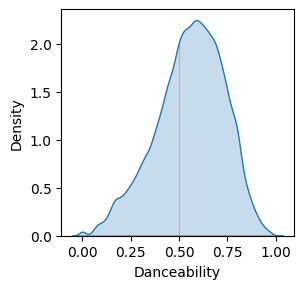

In [25]:
#set figure size
plt.figure(figsize = (3,3), dpi = 100)

#define the plot
sns.kdeplot(Spotify['danceability'], fill = True)
sns.lineplot(x = (0.5 for i in range(0,3)), y = range(0,3), color = 'Red')

#set plot label
plt.xlabel('Danceability')

#display the plot
plt.show()

According to the displayed graph, it can be observed that songs generally exhibit an average level of danceability when their score falls within the range of 0.5 to 0.6. However, as the danceability score exceeds 0.6, the songs are characterized as highly danceable. This graph provides valuable information regarding the relationship between danceability scores and the perceived level of danceability in songs. It suggests that songs with higher danceability scores are more likely to be considered as highly danceable, while those with scores in the 0.5 to 0.6 range are deemed to have an average level of danceability.

Since our primary aim is to get danceable songs for the summer party, we will drop the songs that fall below the average danceability.


7. **Energy**



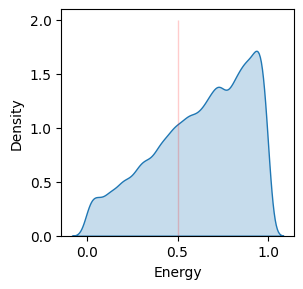

In [26]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(Spotify['energy'], fill = True)
sns.lineplot(x = (0.5 for i in range(0,3)), y = range(0,3), color = 'Red')
plt.xlabel('Energy')
plt.show()

According to the displayed graph, it can be observed that songs generally exhibit an average level of Energy when their score falls within the range of 0.5 upwards. However, as the energy score exceeds 0.6, the songs are characterized as highly Energetic. This graph provides valuable information regarding the relationship between Energetic scores and the perceived level of Energy in songs.

8. **Key**



In [27]:
#Creating a categorical mapping named key names
Spotify['key_names'] = Spotify.key.replace({0: 'C', 1: "C#/Db",  2: 'D', 3: 'D#/Eb', 4: 'E',5:'F', 6: 'F#/Gb', 7: 'G',8: 'G#/Ab', 9: 'A',   10: 'A#/Bb', 11: 'B'})

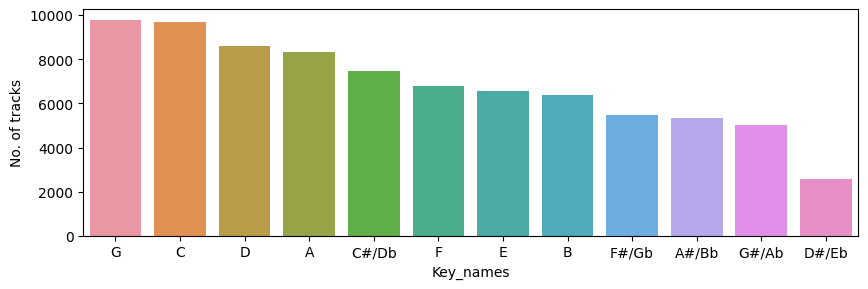

In [28]:
#plotting key variation
plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = Spotify['key_names'].value_counts().index, y = Spotify['key'].value_counts().values)
plt.xlabel('Key_names')
plt.ylabel('No. of tracks')
plt.show()

Upon analyzing the dataset, it becomes evident that the majority of songs are in the key of G, followed by the keys C and D. Conversely, the key D#/Eb appeared the least frequently in the dataset. This dataset provides valuable insights into the distribution of musical keys within the analyzed songs. The prevalence of songs in the key of G suggests its popularity among musicians, potentially due to its tonal qualities or ease of playability. Similarly, the occurrence of songs in the keys of C and D highlights their significance in the musical landscape. On the other hand, the infrequent appearance of the key D#/Eb indicates its lower prevalence compared to the other keys in the dataset.

9. **Loudness**



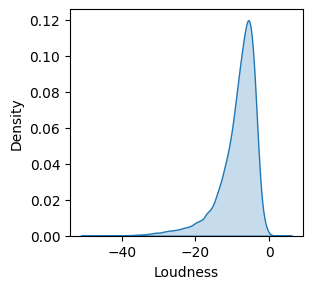

In [29]:
#plotting loudness value
plt.figure(figsize = (3,3), dpi = 100)

#plot definition
sns.kdeplot(Spotify['loudness'], fill = True)
plt.xlabel('Loudness')

#display plot
plt.show()

A KDE plot of the "loudness" column with a higher concentration of values between -20 and 0 suggests that a significant proportion of the songs in the dataset have a moderate to high loudness level. This likely indicates that a substantial portion of the songs are relatively loud or have a strong auditory presence.

In summary, the KDE plot of the "loudness" column with values concentrated between -20 and 0 highlights the prevalence of moderately loud songs in the dataset, offering valuable information for music analysis and genre classification.

10. **Mode**

#### converting the Mode from figures to major/minor



In [30]:
mode_key = {'1':'major', '0':'minor' }

#convert type
Spotify['mode'] = Spotify['mode'].astype(str) 

In [31]:
Spotify['mode'] = Spotify['mode'].replace({'1':'major', '0':'minor' })

Within the dataset, there are several songs that are composed in the major mode. These songs exhibit a distinct tonal quality and convey a sense of brightness and positivity. The major mode is characterized by a specific pattern of intervals that create a harmonically pleasing and uplifting sound. By identifying the songs in the major mode, we can gain insights into the prevalence and popularity of this musical structure within the dataset. Furthermore, the presence of songs in the major mode suggests that musicians often utilize this mode to evoke emotions such as joy, optimism, and triumph in their compositions.

In [32]:
minor = Spotify[Spotify['mode'] =='minor']
minor

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,key_names
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,minor,0.1430,0.032200,0.000001,0.3580,0.715,87.917,4,acoustic,3.8,C#/Db
12,12,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,Solo,52,False,0.489,0.3140,7,-9.245,minor,0.0331,0.749000,0.000000,0.1130,0.607,124.234,4,acoustic,3.3,G
17,17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54,False,0.795,0.0841,10,-18.090,minor,0.0461,0.742000,0.000012,0.0853,0.609,91.803,4,acoustic,2.8,A#/Bb
24,24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,False,0.796,0.6670,5,-4.831,minor,0.0392,0.381000,0.000000,0.2210,0.754,97.988,4,acoustic,3.9,F
25,25,6D33wCKzWtNEgOovgeVJ7r,Jason Mraz,Mellow Adult Pop,Bella Luna,1,False,0.755,0.4540,9,-9.609,minor,0.0352,0.757000,0.000000,0.2360,0.330,120.060,4,acoustic,5.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113982,113982,39So2wAM6l3XKWDf5XjiIz,Planetshakers,All For Love,Come Holy Spirit,36,False,0.437,0.6380,4,-6.483,minor,0.0308,0.211000,0.000428,0.1380,0.159,148.000,4,world-music,5.9,E
113987,113987,4jDhzTYkEG5GloIWwVeVkc,Planetshakers,Revival (Live),All My Life - Live,40,False,0.470,0.9380,11,-4.722,minor,0.1050,0.000529,0.000000,0.2510,0.453,128.002,4,world-music,4.1,B
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,False,0.174,0.1170,0,-18.318,minor,0.0401,0.994000,0.976000,0.1050,0.035,85.239,4,world-music,6.4,C
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,False,0.629,0.3290,0,-10.895,minor,0.0420,0.867000,0.000000,0.0839,0.743,132.378,4,world-music,4.5,C


Within the dataset, there are several songs that are composed in the minor mode. These songs possess a distinct tonal quality that evokes a sense of melancholy, introspection, or even darkness. The minor mode is characterized by a specific pattern of intervals that create a somber and emotional atmosphere. By identifying the songs in the minor mode, we can gain insights into the prevalence and popularity of this musical structure within the dataset. Furthermore, the presence of songs in the minor mode suggests that musicians often utilize this mode to convey feelings of sadness, longing, or introspection in their compositions. The minor mode offers a rich and diverse range of emotions, allowing artists to explore and express a wide array of moods and sentiments in their music.

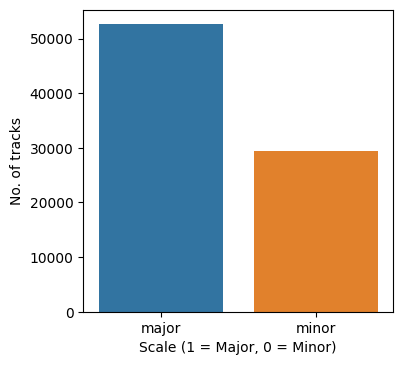

In [33]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x = Spotify['mode'].value_counts().index, y = Spotify['mode'].value_counts().values)
plt.xlabel('Scale (1 = Major, 0 = Minor)')
plt.ylabel('No. of tracks')
plt.show()


According to the chart, it can be observed that a significant number of songs, over 50,000, are composed in the major mode, while approximately 29,000 songs are in the minor mode. This indicates that a majority of the songs in the dataset convey a sense of positivity and evoke uplifting emotions. The prevalence of songs in the major mode suggests that musicians often utilize this mode to create a cheerful and optimistic atmosphere in their compositions. However, it is worth noting that there is still a substantial number of songs in the minor mode, which signifies that artists also recognize the power of evoking deeper emotions and introspection through their music. Overall, the dataset showcases a diverse range of musical expressions, with a significant focus on positivity and soul-lifting themes.

11. **Speechiness**



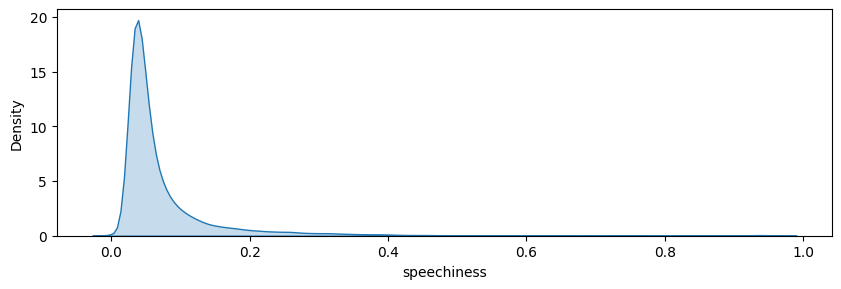

In [34]:
plt.figure(figsize = (10,3), dpi = 100)
sns.kdeplot(Spotify['speechiness'], fill = True)
plt.xlabel('speechiness')
plt.show()

The vast majority of songs in the Spotify library have a speechiness rating below 0.33, indicating that they contain minimal vocals. This suggests that a significant portion of the tracks available on Spotify are instrumental or have limited vocal content. Whether you prefer instrumental music or are seeking a background soundtrack without distracting lyrics, you'll find a wide selection of songs with minimal speechiness in the Spotify library.

12. **Acousticness**

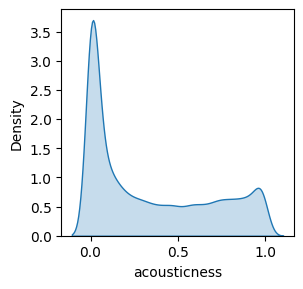

In [35]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(Spotify['acousticness'], fill = True)
plt.xlabel('acousticness')
plt.show()

The majority of tracks available in the library undergo electronic amplification and digital processing. This indicates that a large portion of the music in the library has been enhanced and modified using electronic means. Whether it's through the use of synthesizers, digital effects, or other electronic techniques, these tracks have been shaped and transformed using technology. This prevalence of electronically processed music in the library offers a wide range of sonically diverse and innovative options for listeners

13. **Instrumentalness**

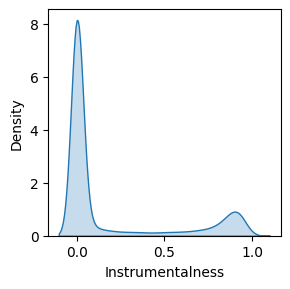

In [36]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(Spotify['instrumentalness'], fill = True)
plt.xlabel('Instrumentalness')
plt.show()

 The graph reveals that a significant portion of the songs in the dataset have a value of 0.0 for instrumentalness. This suggests that the majority of these songs contain vocals in their composition. The prevalence of songs with instrumentalness value of 0.0 indicates that vocals play a prominent role in the dataset, highlighting that the songs are primarily driven by vocal performances and lyrics. It implies that most of the songs in the dataset are not purely instrumental, but rather feature vocals as a key component of their musical arrangement.

14. **Liveness**


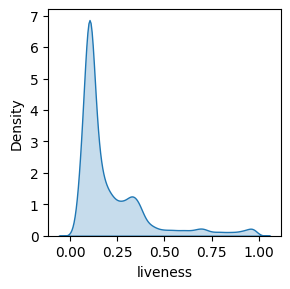

In [37]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(Spotify['liveness'], fill = True)
plt.xlabel('liveness')
plt.show()

The data indicates that a majority of the songs in the dataset have a low liveness value. This suggests that most of these songs are not performed live and are more likely to be studio recordings. The prevalence of songs with low liveness values implies that the dataset consists primarily of tracks that lack the characteristic ambiance, audience interaction, or live performance energy associated with live recordings. It suggests that the majority of the songs in the dataset are not intended to be experienced as live performances but rather as studio-produced tracks.

15. **Valence**

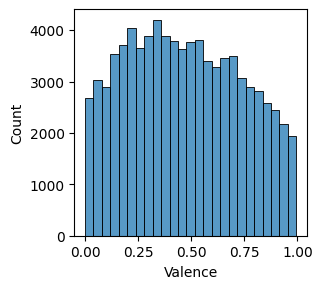

In [38]:
plt.figure(figsize = (3,3), dpi = 100)
sns.histplot(Spotify['valence'], bins =25)
plt.xlabel('Valence')
plt.show()

16. **Tempo**

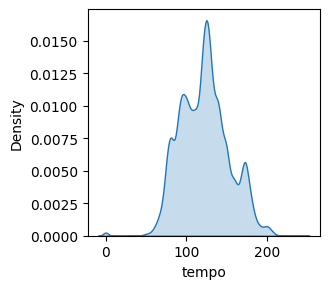

In [39]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(Spotify['tempo'], fill = True)
plt.xlabel('tempo')
plt.show()

The majority of the songs in the dataset have a tempo that falls within the range of approximately 90 to 150. This indicates that most of these songs have a moderate to moderately fast pace. The prevalence of songs within this tempo range suggests that it is a commonly preferred tempo for the analyzed dataset. It implies that the songs in this range are likely to have a similar energetic feel and rhythmic characteristics, contributing to a cohesive musical experience.

17. **Time Signature**




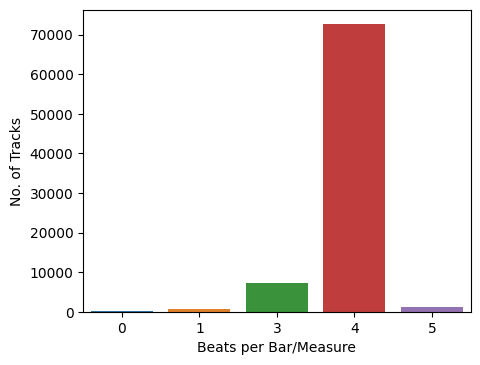

In [40]:
plt.figure(figsize = (5,4), dpi = 100)
sns.barplot(x = Spotify['time_signature'].value_counts().index, y = Spotify['time_signature'].value_counts().values)
plt.xlabel('Beats per Bar/Measure')
plt.ylabel('No. of Tracks')
plt.show()

The majority of the songs in the dataset are written in a 4/4 time signature. This means that these songs have four beats per measure, with a quarter note receiving one beat. The prevalence of songs with this time signature suggests that it is a commonly used and familiar rhythmic structure within the analyzed dataset. The consistent use of 4/4 time signature contributes to a cohesive and easily recognizable rhythmic framework for these songs.

18. **Track Genre**

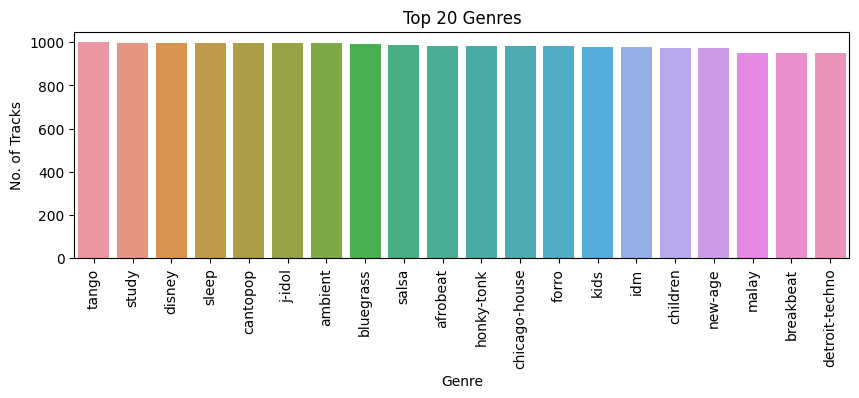

In [41]:
#setting plot size
plt.figure(figsize = (10,3), dpi = 100)

#Define the plot
sns.barplot(x = Spotify['track_genre'].value_counts()[0:20].index, y = Spotify['track_genre'].value_counts()[0:20].values)

#set title and label
plt.xlabel('Genre')
plt.ylabel('No. of Tracks')
plt.xticks(rotation = 90)
plt.title('Top 20 Genres')

#display the plot
plt.show()

# **Analysis of two Variables & Multivariate Analysis**

In [45]:
Spotify.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,key_names
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.461,1,-6.746,minor,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,3.8,C#/Db
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.166,1,-17.235,major,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,2.5,C#/Db


#### understanding the correlation between variables

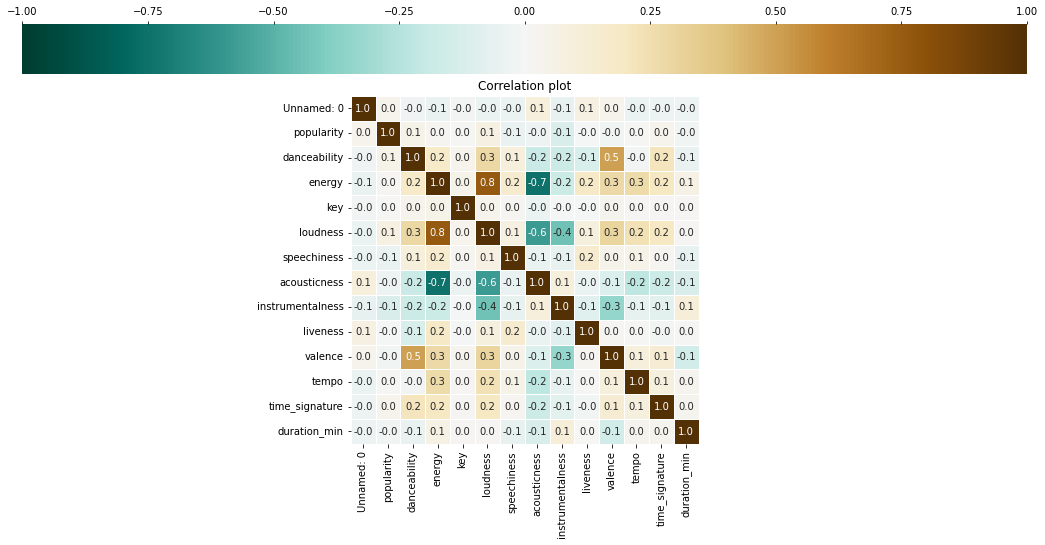

In [48]:
#plot size
plt.figure(figsize=(20,8))

# setting the plot
sns.heatmap(Spotify.drop(columns=['explicit', 'track_id', 'artists', 'album_name','track_name', 'key_names', 'mode','track_genre'], axis=1).corr(), vmax=1, vmin=-1, center=0,
            linewidth=.5,square=True, annot = True,
           fmt='.1f', cmap='BrBG_r',  
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.9)) 


#set plot title
plt.title('Correlation plot')

#display the plot
plt.show()

There is a **strong positive correlation** between `energy and loudness` and a **strong negative correlation** between `energy and acousticness` with `valence and danceability` having a **moderate positive correlation**. On the other hand, `loudness and acousticness` have a **moderate negative correlation** and other columns maintaining minimal correlation.

 **Energy VS Loudness**

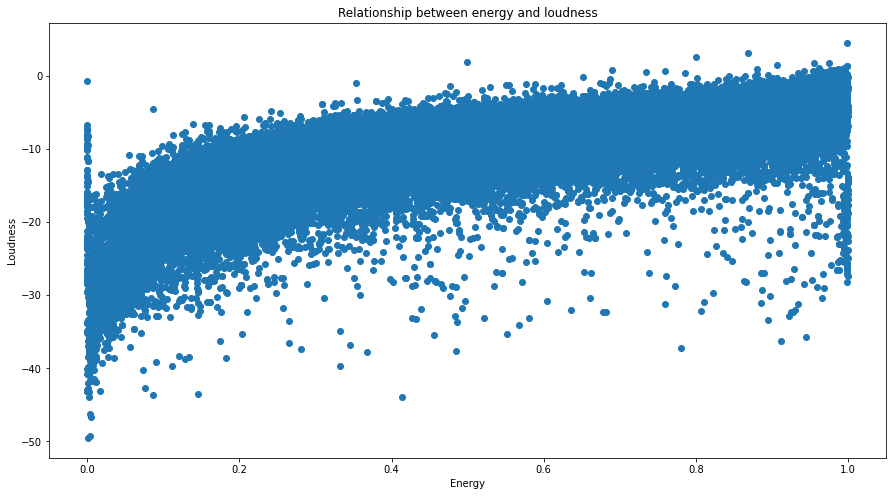

In [49]:
#set plot size
plt.figure(figsize=(15,8))

#define plot
plt.scatter(x=Spotify['energy'], y=Spotify['loudness'])

#set labels
plt.title('Relationship between energy and loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')

#display the plot
plt.show()

1. **Track_name vs Danceability**

In [50]:
Spotify.query('track_name == "Bitches"') 

#Track has explicit value of False despite having an explicit track_name and content

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,key_names
13353,13353,4Y9XI2RRd9w2Ll0fYVBduE,dj funk,Dance Mania: Ghetto Madness,Bitches,10,False,0.981,0.776,11,-7.288,minor,0.259,0.0307,0.000005,0.185,0.727,128.106,4,chicago-house,2.7,B


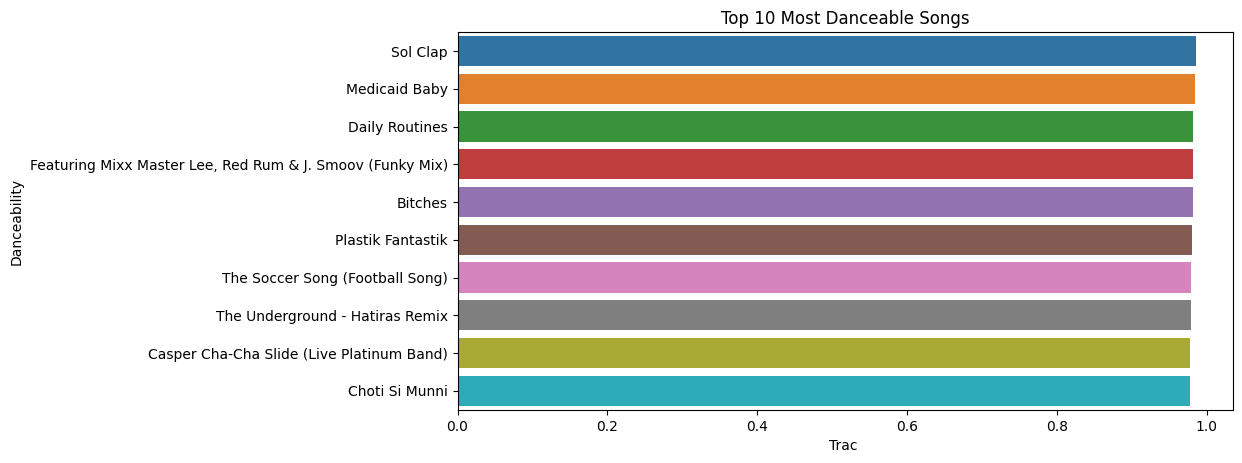

In [51]:
grouped = Spotify.groupby('track_name')['danceability'].mean()

#set plot size
plt.figure(figsize = (10,5), dpi = 100)

#define the plot
sns.barplot(y= grouped.sort_values(ascending = False)[0:10].index, x = grouped.sort_values(ascending = False)[0:10].values)

#setting plot labels
plt.xlabel('Trac ')
plt.ylabel('Danceability')
# plt.xticks(rotation = 90)
plt.title('Top 10 Most Danceable Songs')

#display plot
plt.show()

 By leveraging the track name and danceability attributes, we successfully curated a selection of the dataset's top 10 danceable songs. Through this process, we were able to identify and sort out the tracks that exhibited the highest levels of danceability, allowing us to present a refined and captivating collection of music for dance enthusiasts.

2. **Track Name VS Popularity**

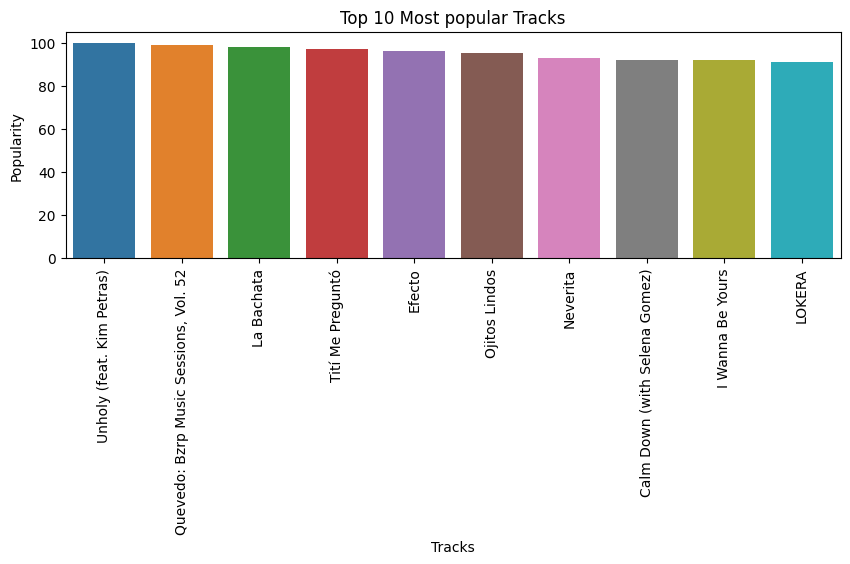

In [52]:
grouped = Spotify.groupby('track_name')['popularity'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values)
plt.xlabel('Tracks')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('Top 10 Most popular Tracks')
plt.show()

By utilizing the track name and popularity metrics, we were able to effectively categorize and identify the top 10 popular songs within the dataset. Through this analysis, we were able to sort the songs based on their level of popularity, allowing us to present a curated list of the most widely recognized and well-received tracks. This approach provides valuable insights into the preferences and trends of music listeners, enabling us to highlight the songs that have garnered significant attention and acclaim.

3. **Track Name VS Energy**

In [53]:
grouped.sort_values(ascending = False)[0:30]

track_name
Unholy (feat. Kim Petras)                   100.0
Quevedo: Bzrp Music Sessions, Vol. 52        99.0
La Bachata                                   98.0
Tití Me Preguntó                             97.0
Efecto                                       96.0
Ojitos Lindos                                95.0
Neverita                                     93.0
Calm Down (with Selena Gomez)                92.0
I Wanna Be Yours                             92.0
LOKERA                                       91.0
Party                                        90.0
Sex, Drugs, Etc.                             90.0
Te Felicito                                  90.0
Dandelions                                   90.0
I Was Never There                            90.0
One Kiss (with Dua Lipa)                     89.0
Gangsta's Paradise                           89.0
lovely (with Khalid)                         89.0
Call Out My Name                             89.0
After LIKE                             

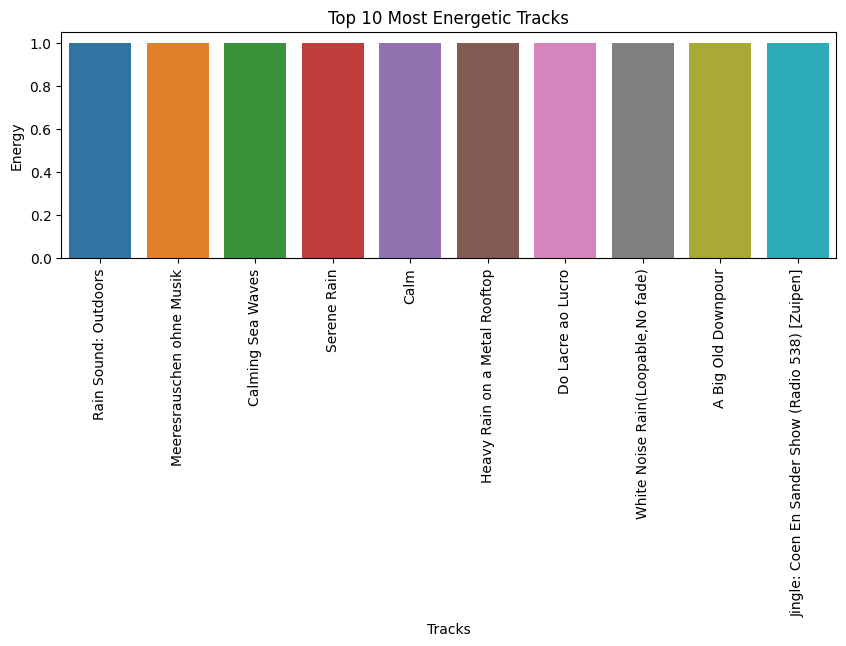

In [54]:
grouped = Spotify.groupby('track_name')['energy'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values)
plt.xlabel('Tracks')
plt.ylabel('Energy')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Energetic Tracks')
plt.show()

By employing the track name and energy attributes, we successfully organized the dataset to identify the top 10 energetic songs. This process involved analyzing the energy levels of each track and sorting them accordingly, allowing us to present a curated selection of high-energy songs. By focusing on the energy aspect, we were able to highlight the tracks that exude vibrancy, excitement, and a dynamic musical experience. This compilation provides an electrifying playlist for those seeking a boost of energy and enthusiasm in their music.

In [ ]:
# len(grouped)
# grouped['tempo'].sort_values(ascending=False).plot(kind='bar')

4. **Track_Name VS Tempo**

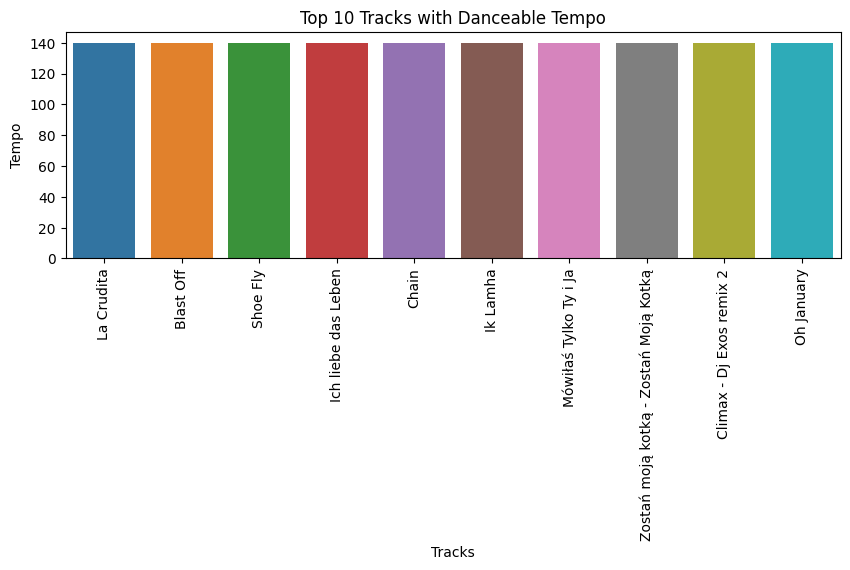

In [56]:
groupTempo = Spotify[(Spotify['tempo']>120 ) & (Spotify['tempo']<=140)]
grouped = groupTempo.groupby('track_name')['tempo'].mean()
plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(  x = grouped.sort_values( ascending = False)[0:10].index, y = grouped.sort_values( ascending = False)[0:10].values)
plt.xlabel('Tracks')
plt.ylabel('Tempo')
plt.xticks(rotation = 90)
plt.title('Top 10 Tracks with Danceable Tempo')
plt.show()

We selected the top 10 tracks that fall within the danceable tempo range of 120 to 140 beats per minute (BPM). This tempo range is known to be conducive to dancing, providing a lively and energetic rhythm. By focusing on tracks within this range, we ensured that the chosen songs would have a tempo that aligns with the desired danceability criteria.

5. **Track_Name VS Valence**

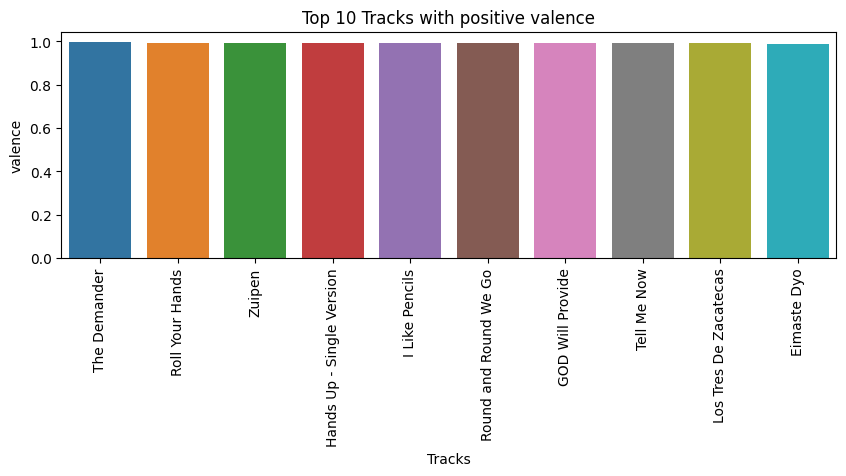

In [57]:
grouped = Spotify.groupby('track_name')['valence'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values)
plt.xlabel('Tracks')
plt.ylabel('valence')
plt.xticks(rotation = 90)
plt.title('Top 10 Tracks with positive valence')
plt.show()

Songs with a positive valence have the power to uplift the mood and create an atmosphere that is lively and happy. These songs emit a sense of positivity and joy, infusing the room with an uplifting energy. With their upbeat melodies, catchy rhythms, and optimistic lyrics, songs with positive valence can bring a smile to people's faces and encourage them to dance, sing along, or simply enjoy the moment. Whether it's a social gathering, a party, or even a personal listening experience, these songs have the ability to enhance the overall mood and create a vibrant and cheerful ambiance.

6. **Popularity VS Genre**

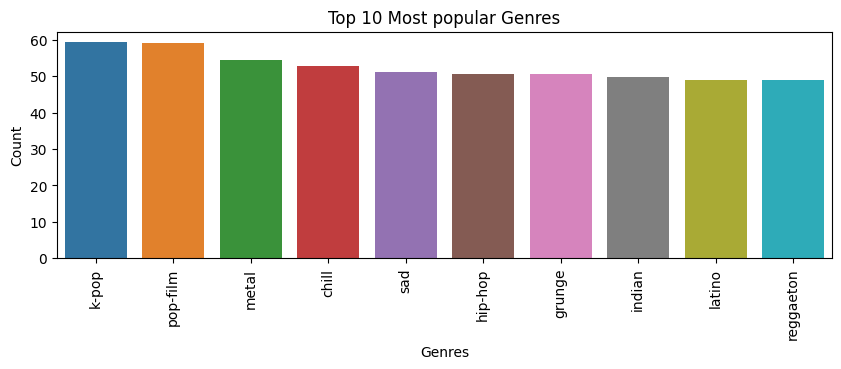

In [58]:
grouped = Spotify.groupby('track_genre')['popularity'].mean()

plt.figure(figsize=(10, 3), dpi=100)
sns.barplot(x=grouped.sort_values(ascending=False)[0:10].index, y=grouped.sort_values(ascending=False)[0:10].values)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 10 Most popular Genres')
plt.show()

The following analysis reveals the top 10 most popular genres found within the dataset. By examining the data, we have identified the genres that occur most frequently across the tracks. This information provides valuable insights into the musical preferences and trends represented in the dataset. By understanding the most popular genres, we can gain a better understanding of the overall musical landscape and the genres that resonate the most with listeners. These top 10 genres represent the ones that have the highest occurrence rate, showcasing their popularity and prominence within the dataset.

7. **Danceability VS Genre**

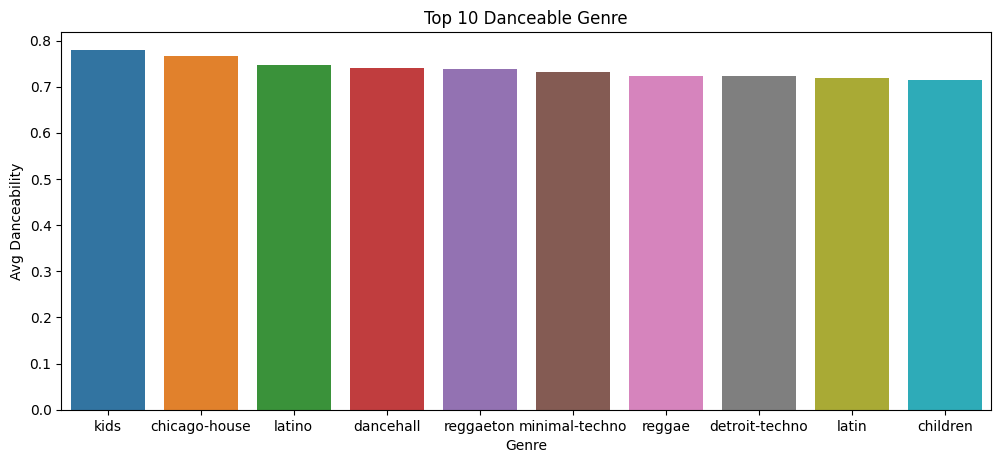

In [59]:
genre_spotify = Spotify.groupby('track_genre')['danceability'].mean()

plt.figure(figsize = (12,5), dpi = 100)
sns.barplot(x = genre_spotify.sort_values(ascending = False)[0:10].index,
            y = genre_spotify.sort_values(ascending = False)[0:10].values)
plt.xlabel('Genre')
plt.ylabel('Avg Danceability')
plt.title('Top 10 Danceable Genre')

plt.show()

After analyzing the dataset, we have identified the top 10 most danceable genres. These genres stand out for their high danceability scores, indicating their suitability for getting people on their feet and moving to the rhythm. By considering factors such as tempo, rhythm, and beat, the danceability metric provides insights into the genres that are most likely to inspire and encourage dancing. These top 10 genres represent the ones with the highest danceability ratings within the dataset, showcasing their ability to create an energetic and lively atmosphere that is perfect for dancing and enjoying the music.

In [ ]:
Spotify.sort_values(by = 'popularity', ascending = False)[['track_name', 'artists', 'danceability','popularity','track_genre','valence','tempo','energy']].head(50)

# **Data Preprocessing**

Create a copy of the dataframe

In [60]:
spotify_copy = Spotify.copy()

spotify_copy.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,key_names
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.461,1,-6.746,minor,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,3.8,C#/Db
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.166,1,-17.235,major,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,2.5,C#/Db


#### Checking and removing outliers in the data using boxplot

<Axes: >

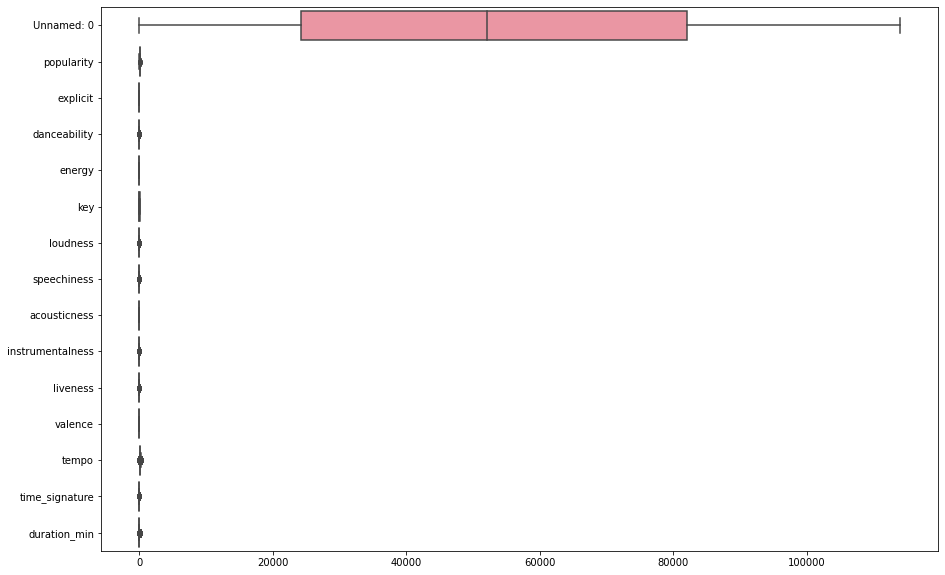

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(spotify_copy, orient='h')

The margin of outliers vary per column in the dataset. Each column will be investigated and the outliers removed. The `popularity and tempo` column will be ignored because it is a secondary feature that determines if a track is danceable.

## Removing Outlier using Loudness
Using the Boxplot IQR, values above the 25th Quartile and below the 75th Quartile

In [63]:
spotify_copy.loudness.describe()

count    82036.000000
mean        -8.673483
std          5.338701
min        -49.531000
25%        -10.563000
50%         -7.318000
75%         -5.179000
max          4.532000
Name: loudness, dtype: float64

In [64]:
spotify_copy = spotify_copy[(spotify_copy.loudness >= -10.56) & (spotify_copy.loudness <= -5.17)]

In [65]:
spotify_copy.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,key_names
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.461,1,-6.746,minor,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,3.8,C#/Db
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.359,0,-9.734,major,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic,3.5,C


In [66]:
spotify_copy.shape

(41095, 22)

## Removing Outlier using Duration

In [67]:
spotify_copy.duration_min.describe()

count    41095.000000
mean         3.946327
std          1.835019
min          0.400000
25%          3.000000
50%          3.700000
75%          4.500000
max         76.100000
Name: duration_min, dtype: float64

Since its  a company party with, events will be scheduled. And assuming that the playlist will be in place of the DJ, It will be inadmissible to involve tracks with longer minutes. 

Overtime, tracks with shorter time frame tend to keep the mood lively as it transitions between a genre to another. We will be selecting the tracks based on  the value of the `25% and 75%` as minimum and maximum outlier values respectively.

In [68]:
spotify_copy = spotify_copy.query('duration_min  < 4.2')

In [69]:
spotify_copy

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,key_names
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.461,1,-6.746,minor,0.1430,0.03220,0.000001,0.3580,0.7150,87.917,4,acoustic,3.8,C#/Db
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.359,0,-9.734,major,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic,3.5,C
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.443,2,-9.681,major,0.0526,0.46900,0.000000,0.0829,0.1670,119.949,4,acoustic,3.3,D
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,False,0.688,0.481,6,-8.807,major,0.1050,0.28900,0.000000,0.1890,0.6660,98.017,4,acoustic,3.6,F#/Gb
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,False,0.407,0.147,2,-8.822,major,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic,3.8,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113955,113955,6ibX7aG1bsQzTJb5gUjCpn,Bryan & Katie Torwalt,Praise Before My Breakthrough,My Hallelujah,46,False,0.453,0.498,2,-8.341,major,0.0427,0.87900,0.000023,0.1060,0.1780,137.831,4,world-music,4.1,D
113957,113957,5LOmYKKXSkAeB4m2YsDJrI,for KING & COUNTRY;Lecrae;The WRLDFMS Tony Wil...,Amen (Reborn),Amen (Reborn),47,False,0.428,0.599,9,-5.508,minor,0.0586,0.01320,0.000000,0.2680,0.2530,119.993,4,world-music,3.8,A
113975,113975,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship;Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,False,0.611,0.857,0,-6.248,minor,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music,3.6,C
113984,113984,0PjyOURxQ6wiHaBYXf53G2,Tenth Avenue North,The Light Meets The Dark,Healing Begins,44,False,0.541,0.583,2,-7.047,major,0.0285,0.01420,0.000000,0.1020,0.2760,96.008,4,world-music,4.0,D


<Axes: >

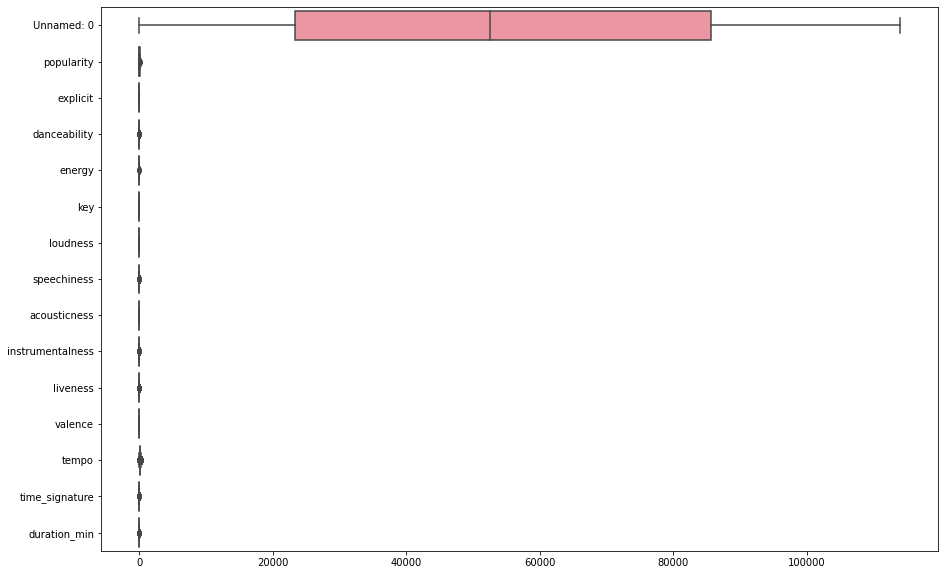

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(spotify_copy, orient='h')

## Observing the track genre for genres that might be considered  undanceable

In [71]:
genres = spotify_copy.track_genre.values

In [72]:
genres_unique = set(genres.tolist())

### Number of genres in our dataset

In [73]:
len(genres_unique)

113

observing genre categories

from the above result genres like `kids, children, sleep and sad` contain noise (based on practical examination) and are not suitable to create an electritying mood. This genres will be dropped

In [74]:
spotify_copy

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,key_names
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.461,1,-6.746,minor,0.1430,0.03220,0.000001,0.3580,0.7150,87.917,4,acoustic,3.8,C#/Db
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.359,0,-9.734,major,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic,3.5,C
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.443,2,-9.681,major,0.0526,0.46900,0.000000,0.0829,0.1670,119.949,4,acoustic,3.3,D
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,False,0.688,0.481,6,-8.807,major,0.1050,0.28900,0.000000,0.1890,0.6660,98.017,4,acoustic,3.6,F#/Gb
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,False,0.407,0.147,2,-8.822,major,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic,3.8,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113955,113955,6ibX7aG1bsQzTJb5gUjCpn,Bryan & Katie Torwalt,Praise Before My Breakthrough,My Hallelujah,46,False,0.453,0.498,2,-8.341,major,0.0427,0.87900,0.000023,0.1060,0.1780,137.831,4,world-music,4.1,D
113957,113957,5LOmYKKXSkAeB4m2YsDJrI,for KING & COUNTRY;Lecrae;The WRLDFMS Tony Wil...,Amen (Reborn),Amen (Reborn),47,False,0.428,0.599,9,-5.508,minor,0.0586,0.01320,0.000000,0.2680,0.2530,119.993,4,world-music,3.8,A
113975,113975,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship;Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,False,0.611,0.857,0,-6.248,minor,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music,3.6,C
113984,113984,0PjyOURxQ6wiHaBYXf53G2,Tenth Avenue North,The Light Meets The Dark,Healing Begins,44,False,0.541,0.583,2,-7.047,major,0.0285,0.01420,0.000000,0.1020,0.2760,96.008,4,world-music,4.0,D


Observing from the tail artists like `Hillsong, Tenth avenue, Bryan & katie Torwait` were observed to be gospel artists. This led to further observation of their profile and they're found to be Gospel/Christain artists. We will look into the `world-music` genre and observe the artists profile.

In [75]:
world_music = spotify_copy.query('track_genre == "world-music"')

In [76]:
print(set(world_music.artists.tolist()))

{'Matt Redman', 'Tenth Avenue North', 'Hillsong Young & Free', 'Cesária Evora;Ismaël Lô', 'one sonic society;Elle Limebear', 'Rend Collective', 'Phillips, Craig & Dean', 'Hillsong Worship;Delirious?', 'Vertical Worship', 'Fee', 'for KING & COUNTRY;R3HAB', 'Hillsong Kids', 'Leeland', 'Hillsong Young & Free;Alexander Pappas', 'for KING & COUNTRY', 'Michael W. Smith;Carrie Underwood', 'Planetshakers', 'Bryan & Katie Torwalt', 'Chris Tomlin;Blessing Offor', 'Hillsong Worship;Benjamin William Hastings', 'Chris Tomlin', 'for KING & COUNTRY;Andy Mineo', 'for KING & COUNTRY;Rebecca St. James', 'Hillsong Young & Free;Hillsong en Español', 'Cory Asbury;Tori Kelly', 'for KING & COUNTRY;Echosmith;Timbaland', 'Urban Rescue', 'Mosaic MSC', 'Raul Paz', 'for KING & COUNTRY;Jordin Sparks', 'Chris McClarney;Hollyn', 'Aaron Keyes', 'Hillsong Worship', 'for KING & COUNTRY;Dolly Parton', 'Michael W. Smith;Vanessa Campagna', 'Starfield', 'Shane & Shane', 'Cesária Evora', 'Paul Baloche', 'Mosaic MSC;Cody Car

`world-music` is a broad and inclusive term used to describe a genre of music that encompasses a wide range of musical styles and traditions from around the world. It is not a specific genre but rather a category that serves as an umbrella term for music that originates from various cultures, regions, and traditions.  

From the above list, There are more christain artists compared to the traditional and other cultural artists. Therefore, `world-music, kids, children, sleep and sad` genres will be dropped.

In [77]:
genres_to_drop = ['world-music', 'kids', 'children', 'sleep', 'sad']
spotify_copy = spotify_copy[~spotify_copy['track_genre'].isin(genres_to_drop)]

## Dropping tracks based on liveness.

This is due to the facts that live tracks tend to be performed at the discretion of the artists unlike how it is perfromed in a studio track. Live tracks are most suitable for its immediate audience so tracks live tracks will be dropped. i.e tracks with liveness above 0.8

In [78]:
live_tracks = spotify_copy.query('liveness >= 0.8')

#### **Drop non needed columns**

In [79]:
spotify_df = spotify_copy.drop(columns=['track_id',  'album_name', 'explicit', 'mode', 'key','key_names'], axis=1)

### **Dimensionality reduction**

#### Reducing the dimensionality by mean

In [80]:
spotify_df = spotify_df.query('instrumentalness < 0.11 & valence > 0.56 & tempo > 0.4 & energy > 0.67')

In [81]:
spotify_df.tempo.describe()

count    5608.000000
mean      126.826834
std        28.103166
min        51.953000
25%       104.238000
50%       124.989500
75%       146.028750
max       219.571000
Name: tempo, dtype: float64

In [82]:
spotify_df.energy.mean()

0.7969832382310984

In [83]:
rap = spotify_df.query('speechiness >= 0.33 & speechiness <= 0.66')

From our data description, tracks that fall within the speechinees value of `0.33 and 0.66` can be regarded as rap songs.

In [84]:
rap_tracks = spotify_df.query('speechiness >= 0.33 & speechiness <= 0.66')

#### Observe columns by variance to understand which requires scaling

In [85]:
spotify_df.var()

TypeError: could not convert string to float: 'Brandi Carlile;Lucius'

In [ ]:
spotify_df.head(2)

## Scaling columns

The disparity in variance of `popularity, loudness, tempo, and duration_min` is unbalanced. We will now scale this values to put them on the same measurement. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['popularity', 'tempo', 'loudness', 'duration_min']
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns and replace the original values
spotify_df[columns_to_scale] = scaler.fit_transform(spotify_df[columns_to_scale])

In [ ]:
spotify_df.shape

In [ ]:
#rechecking the var scaled values
spotify_df.var()

## Training and evaluating our RandomForestRegressor model

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = spotify_df

# Features and target variable
features = ['energy', 'valence', 'liveness', 'speechiness', 'tempo', 'acousticness']  
target = 'danceability'  # Replace with your target variable

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict danceability scores
y_pred = random_forest_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.009055379624789986
R-squared (R2): 0.40623428331974243


Energy was selected because a relationship was obseved between energy and danceability while practicallly testing the songs (i.e if energy and danceability are above 0.56, the song gives danceable vibes.). Also valence was inicluded becuase it determines the how happy and lively t  

## Predict and recommend danceability using our model

In [88]:
# Predict danceability scores for all songs 
predicted_danceability = random_forest_model.predict(data[features])

# Add the predicted danceability scores to the data
data['predicted_danceability'] = predicted_danceability

# Sort the dataset by predicted danceability in descending order
recommended_songs = data.sort_values(by='predicted_danceability', ascending=False)

# Select the top 50 recommended songs
top_50_recommendations = recommended_songs.head(50)

# Display the top 50 recommended songs
print("Top 50 Recommended Songs based on Predicted Danceability:")
# print(top_50_recommendations[['track_name', 'artists', 'predicted_danceability']])
recommended_songs.head(50)

Top 50 Recommended Songs based on Predicted Danceability:


,Unnamed: 0,artists,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,predicted_danceability
36907,36907,MHD,Afro Trap Pt. 7 (La puissance),65,0.970,0.806,-5.628,0.2980,0.095500,0.000000,0.1330,0.815,120.003,4,french,2.3,0.90166
13353,13353,dj funk,Bitches,10,0.981,0.776,-7.288,0.2590,0.030700,0.000005,0.1850,0.727,128.106,4,chicago-house,2.7,0.88544
28745,28745,Mungo's Hi Fi;Eva Lazarus,We Weren't Made for This,25,0.913,0.692,-9.203,0.0501,0.063600,0.000036,0.0585,0.947,130.074,4,dub,3.5,0.87882
60722,60722,Busy Signal,Tic Toc,20,0.961,0.689,-9.250,0.2610,0.113000,0.000258,0.1540,0.874,119.961,4,j-dance,3.3,0.87749
21417,21417,Spice;Epik Jones;No Saints,Cool It (No Saints Remix),29,0.911,0.676,-7.684,0.2510,0.128000,0.001810,0.2100,0.820,100.062,4,dancehall,2.4,0.87413
69013,69013,Marthyan;Sushin Shyam,Thee Minnal,50,0.901,0.709,-8.530,0.0480,0.426000,0.015600,0.3090,0.903,127.002,4,malay,2.2,0.87193
69058,69058,Marthyan;Sushin Shyam,Thee Minnal,45,0.901,0.709,-8.530,0.0480,0.426000,0.015600,0.3090,0.903,127.002,4,malay,2.2,0.87193
13816,13816,Fast Eddie,Pump It - Skip The Bass Mixx,5,0.936,0.827,-7.689,0.0430,0.000465,0.018500,0.0554,0.963,128.087,4,chicago-house,3.2,0.87081
25499,25499,DiscoBoys,Mały Miś,0,0.930,0.811,-5.704,0.1260,0.062900,0.000000,0.1010,0.930,142.068,4,disco,3.5,0.87076
95450,95450,Baby Rasta & Gringo;DJ Nelson,En La Disco,33,0.913,0.746,-9.420,0.1710,0.052300,0.001130,0.2240,0.838,95.027,4,salsa,3.3,0.86742


<Axes: xlabel='track_genre'>

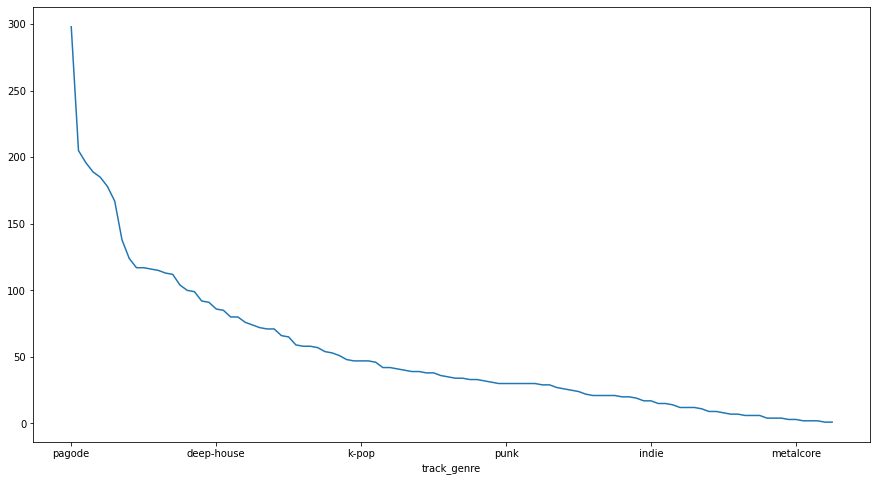

In [89]:
plt.figure(figsize=(15,8))
recommended_songs.track_genre.value_counts().plot()

The metrics i used to overall

In [ ]:
# # #valence is a factor for identifying happy and or cheerful songs 
# # #checking liveness

# # # energy_dance = energy_dance[energy_dance['track_genre'] != 'world-music']
# # #there are gospel musics in various categories like alternate, world-music, children, sad, emo, goth
# # #From observation, liveness does not affect the danceability of the song 

# # #checking liveness
# # #there are gospel musics in various categories like alternate, world-music
# # #From observation, liveness does not affect the danceability of the song 

# # energy_dance[energy_dance['instrumentalness'] > 0.15].head(23)
# # #songs with instrumentalness above average (0.15)tend to be slow despite having a high tempo and high danceability value
# # #Although it doesn't show in the correlation matrix, instrumentalness is a cogent factor of fast and danceable music


# # #observing valence: the closer the value is to 1, the more positive(cheerful, happy, euphoric) the song is.
# energy_dance = Spotify[(Spotify['danceability'] > 0.56) & (Spotify['energy'] > 0.64)]

# #Although it doesn't show in the correlation matrix, instrumentalness is a cogent factor of fast and danceable music



#drop key and mode column

#Speechiness
#drop songs with low speechiness
# average speechiness is rap


#there is a negative correlation between acousticness and energy